# Stiff ODE. Task X.9.10. Anton Ryabtsev. DCAM MIPT.

**Task:** The simplest model of glycolysis is described by the following equations:
$$ \begin{cases}
\dot{y_1} = 1 - y_1y_2 \\
\dot{y_2} = \alpha y_2\Bigl(y_1 - \dfrac{1 + \beta}{y_2 + \beta}\Bigr)
\end{cases} $$
proposed by J. Higgins.

In the system, β = 10, α = 100, 200, 400, 1000.
Initial conditions for the system: $y_1(0) = 1, y_2(0) = 0.001, T_k = 50$.

The solution to this system is relaxation self-oscillations (stiff limit cycle).

## Solution.

From theory it is known that for methods with relaxation oscillations it is better to use methods of not very high order of approximation. That's why we will use **implicit Euler method**, which has the first order of approximation.

In [1]:
%matplotlib inline
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
b = 10
a_list = [100, 200, 400, 1000]
h_list = [0.001, 0.001, 0.0001, 0.0001]
T = 50

y_initial = [[1, 0.001]]

### Implicit Euler method.

$$
\dfrac{y_{n+1} - y_n}{h} = f(x_{n+1}, y_{n+1})
$$


To get $y_{n+1}$ out of the equation, we expand the function into a taylor series:


$$
f(x_{n+1}, y_{n+1}) = f(x_{n+1}, y_n + (y_{n+1} - y_n)) \approx f(x_{n+1}, y_n) + \mathcal{J}_y(x_{n+1}, y_n)(y_{n+1} - y_n)
$$

Now we expand $\begin{pmatrix}
y_1^{n+1} \\
y_2^{n+1} 
\end{pmatrix}$:

$$
\begin{pmatrix}
y_1^{n+1} \\
y_2^{n+1} 
\end{pmatrix} =
\begin{pmatrix}
y_1^n \\
y_2^n 
\end{pmatrix} +
\begin{pmatrix}
\dfrac{1 - y_1^ny_2^n}{\frac{1}{h} - \mathcal{J}_y(x_{n+1}, y^n)} \\
\dfrac{\alpha y_2^n\Bigl(y_1^n - \dfrac{1 + \beta}{y_2^n + \beta}\Bigr)}{\frac{1}{h} - \mathcal{J}_y(x_{n+1}, y^n)}
\end{pmatrix}
$$


### Jacobian.

$$
\mathcal{J}_y = 
\det\begin{pmatrix}
\dfrac{\partial f_1}{\partial y_1} & \dfrac{\partial f_1}{\partial y_2}\\
\dfrac{\partial f_2}{\partial y_1} & \dfrac{\partial f_2}{\partial y_2}
\end{pmatrix}
$$

For our function Jacobian is:

$$
\det\begin{pmatrix}
-y_2^n &  & -y_1^n\\
\\
\alpha y_2^n & & \alpha y_1^n - \dfrac{\alpha\beta(1 + \beta)}{(y_2^n + \beta)^2}
\end{pmatrix}
$$

In [3]:
def Jacobian(i, a):  # i=0..(N-1)
    J = np.ndarray(shape=(2,2), dtype=float)
    J[0][0] = -y[i][1]
    J[0][1] = -y[i][0]
    J[1][0] = a * y[i][1]
    J[1][1] = a * y[i][0] - (a * (1 + b) * b) / (y[i][1] + b)**2
    return np.linalg.det(J)

In [4]:
def new_y1(y, i, a):  # i=0..(N-1)
    return y[i][0] + (1 - y[i][0] * y[i][1]) / (1/h - Jacobian(i, a))

def new_y2(y, i, a):  # i=1..N
    return y[i][1] + a * y[i][1] * (y[i][0] - (1 + b) / (y[i][1] + b)) / (1/h - Jacobian(i, a))

In [5]:
params = tuple(zip(a_list, h_list))
y1_list = []
y2_list = []
x_list = []
for a, h in params:
    print(f'alpha = {a};    h = {h}')    
    
    x = np.arange(0, T + 1, h)
    
    y = y_initial[:]

    for i in range(len(x) - 1):
        y.append([new_y1(y, i, a), new_y2(y, i, a)])
        

    y1 = np.array(y).flatten()[::2]
    y2 = np.array(y).flatten()[1::2]
    x_list.append(x)
    y1_list.append(y1)
    y2_list.append(y2)

alpha = 100;    h = 0.001
alpha = 200;    h = 0.001
alpha = 400;    h = 0.0001
alpha = 1000;    h = 0.0001


In [6]:
def builtGraphs(axes, i, j, x, y):
    if(i == 0):
        if(j == 0):
            axes[i, j].set_title('y1(x)', fontsize=17)
            axes[i, j].set_ylabel('alpha = 100', fontsize=17)            
        if(j == 1):
            axes[i, j].set_title('y2(x)', fontsize=17)
        if(j == 2):
            axes[i, j].set_title('Phase trajectories  y2(y1)', fontsize=17)
    if(i == 1 and j == 0):
        axes[i, j].set_ylabel('alpha = 200', fontsize=17)
    if(i == 2 and j == 0):
        axes[i, j].set_ylabel('alpha = 400', fontsize=17)
    if(i == 3 and j == 0):
        axes[i, j].set_ylabel('alpha = 1000', fontsize=17)
    
    axes[i, j].plot(x, y)

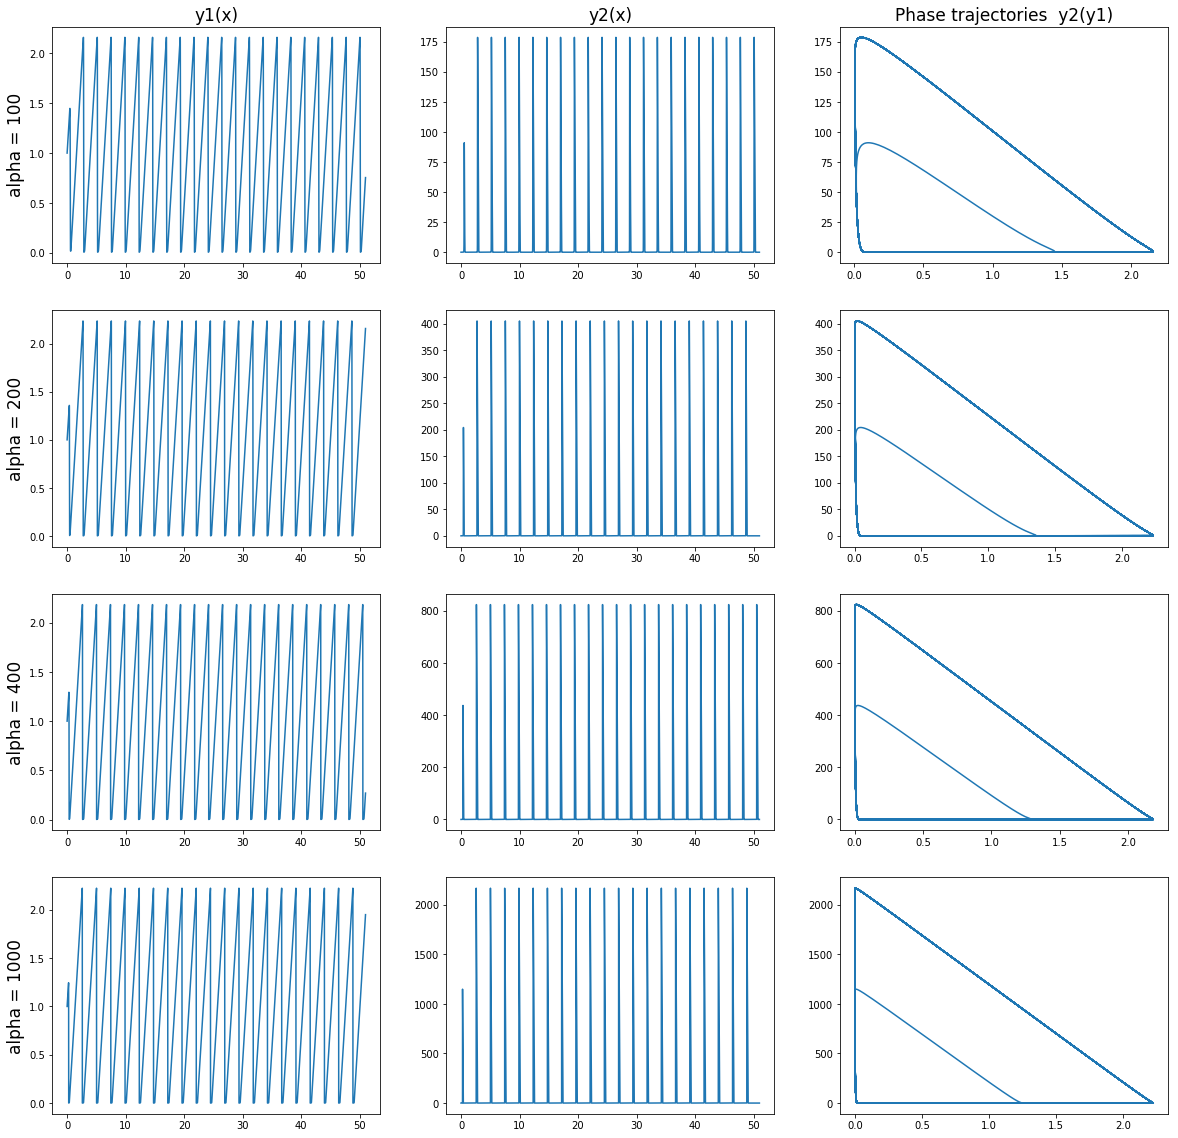

In [7]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))

builtGraphs(axes, 0, 0, x_list[0], y1_list[0])
builtGraphs(axes, 0, 1, x_list[0], y2_list[0])
builtGraphs(axes, 0, 2, y1_list[0], y2_list[0])

builtGraphs(axes, 1, 0, x_list[1], y1_list[1])
builtGraphs(axes, 1, 1, x_list[1], y2_list[1])
builtGraphs(axes, 1, 2, y1_list[1], y2_list[1])

builtGraphs(axes, 2, 0, x_list[2], y1_list[2])
builtGraphs(axes, 2, 1, x_list[2], y2_list[2])
builtGraphs(axes, 2, 2, y1_list[2], y2_list[2])

builtGraphs(axes, 3, 0, x_list[3], y1_list[3])
builtGraphs(axes, 3, 1, x_list[3], y2_list[3])
builtGraphs(axes, 3, 2, y1_list[3], y2_list[3])

## Damped oscillations (steady focus on the phase plane).

We can change parameters in order to observe damped oscillations.

### Let's $\alpha = 5$, $\beta = 5$.

In [8]:
a = 5
b = 5

y = y_initial[:]
h = 0.0001
x = np.append(np.arange(0, T, h), 50)
for i in range(len(x) - 1):
    y.append([new_y1(y, i, a), new_y2(y, i, a)])

y1 = np.array(y).flatten()[::2]
y2 = np.array(y).flatten()[1::2]

In [9]:
def builtGraphs2(axes, i, x, y):    
    if(i == 0):
        axes[i].set_title('y1(x)', fontsize=17)         
    if(i == 1):
        axes[i].set_title('y2(x)', fontsize=17)
    if(i == 2):
        axes[i].set_title('Phase trajectories  y2(y1)', fontsize=17)    
    axes[i].grid()
    axes[i].plot(x, y)

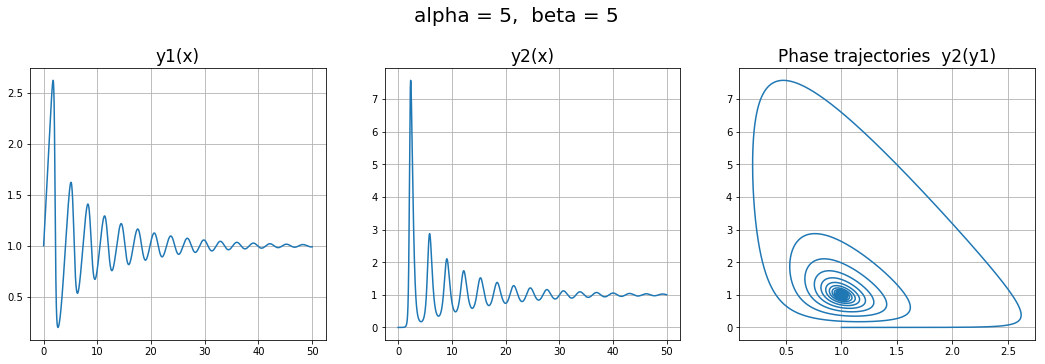

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

fig.suptitle('alpha = 5,  beta = 5', fontsize=20, y=1.05)

builtGraphs2(axes, 0, x, y1)
builtGraphs2(axes, 1, x, y2)
builtGraphs2(axes, 2, y1, y2)

## Now $\alpha = 10, \beta = 10$.

In [11]:
a = 10
b = 10

y = y_initial[:]
h = 0.0001
x = np.append(np.arange(0, T, h), 50)
for i in range(len(x) - 1):
    y.append([new_y1(y, i, a), new_y2(y, i, a)])

y1 = np.array(y).flatten()[::2]
y2 = np.array(y).flatten()[1::2]

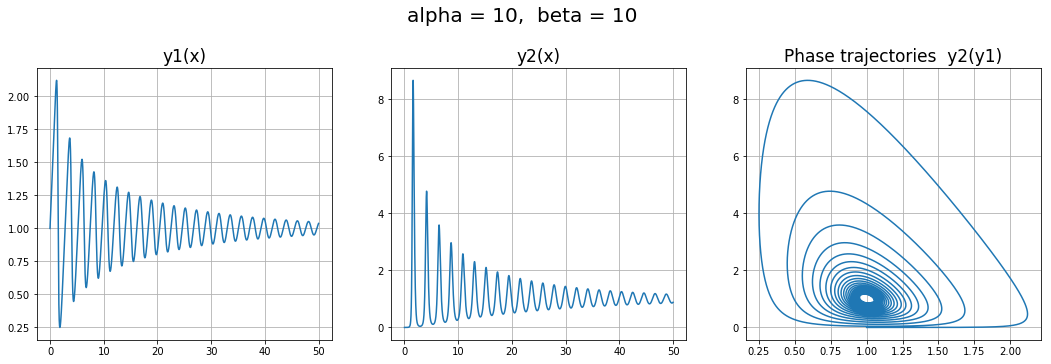

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

fig.suptitle('alpha = 10,  beta = 10', fontsize=20, y=1.05)

builtGraphs2(axes, 0, x, y1)
builtGraphs2(axes, 1, x, y2)
builtGraphs2(axes, 2, y1, y2)

## Let's $\alpha = 25, \beta = 25$.

In [13]:
a = 25
b = 25

y = y_initial[:]
h = 0.0001
x = np.append(np.arange(0, T, h), 50)
for i in range(len(x) - 1):
    y.append([new_y1(y, i, a), new_y2(y, i, a)])

y1 = np.array(y).flatten()[::2]
y2 = np.array(y).flatten()[1::2]

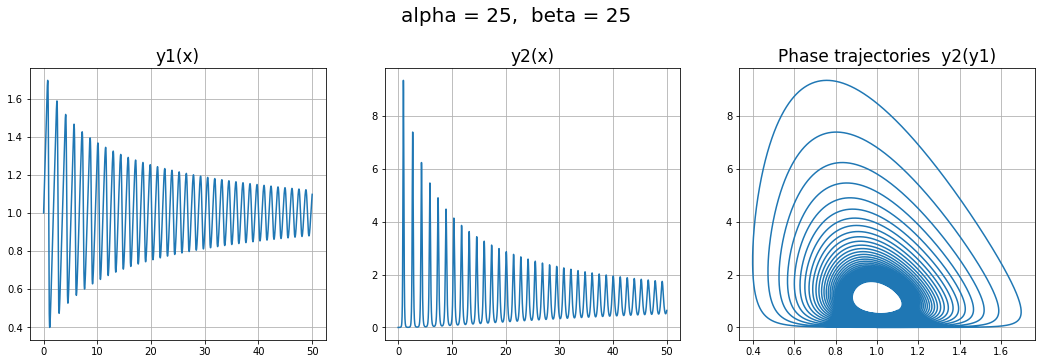

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

fig.suptitle('alpha = 25,  beta = 25', fontsize=20, y=1.05)

builtGraphs2(axes, 0, x, y1)
builtGraphs2(axes, 1, x, y2)
builtGraphs2(axes, 2, y1, y2)

## Now $\alpha = 10, \beta = 100$.

In [15]:
a = 10
b = 100

y = y_initial[:]
h = 0.0001
x = np.append(np.arange(0, T, h), 50)
for i in range(len(x) - 1):
    y.append([new_y1(y, i, a), new_y2(y, i, a)])

y1 = np.array(y).flatten()[::2]
y2 = np.array(y).flatten()[1::2]

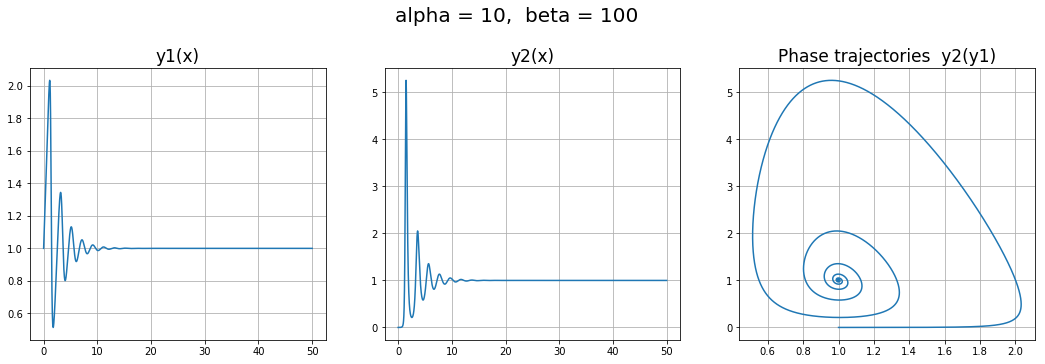

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

fig.suptitle('alpha = 10,  beta = 100', fontsize=20, y=1.05)

builtGraphs2(axes, 0, x, y1)
builtGraphs2(axes, 1, x, y2)
builtGraphs2(axes, 2, y1, y2)

## Now let's $\alpha = 100, \beta = 1000$.

In [17]:
a = 100
b = 1000

y = y_initial[:]
h = 0.0001
x = np.append(np.arange(0, T, h), 50)
for i in range(len(x) - 1):
    y.append([new_y1(y, i, a), new_y2(y, i, a)])

y1 = np.array(y).flatten()[::2]
y2 = np.array(y).flatten()[1::2]

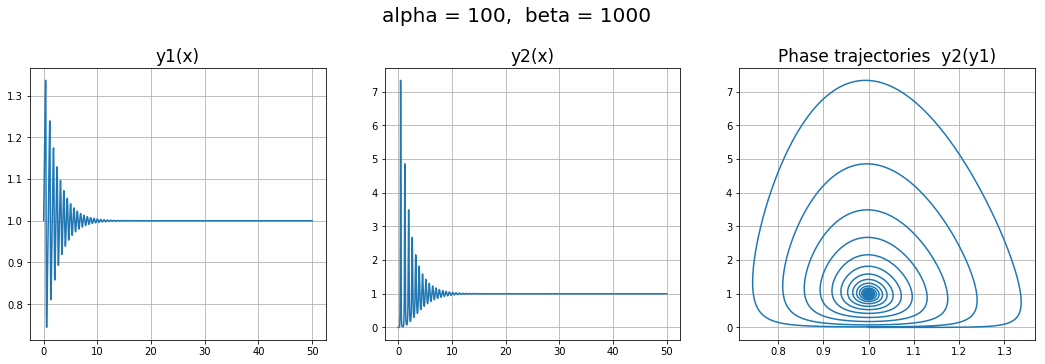

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

fig.suptitle('alpha = 100,  beta = 1000', fontsize=20, y=1.05)

builtGraphs2(axes, 0, x, y1)
builtGraphs2(axes, 1, x, y2)
builtGraphs2(axes, 2, y1, y2)

# Conclusion.

The results we obtained are excellent corresponding with the theory.